<a href="https://colab.research.google.com/github/itsmuditt/Stock_Price_Prediction/blob/main/Copy_of_DL_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*`Imports and Data Call through 'yfinance' API`*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pip
import time
import datetime
import pickle

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
company = input("Enter the name of company you want Prediction of: ")
begin = time.time()

Enter the name of company you want Prediction of: INFY.NS


In [ ]:
# These dates are not accurate
end_date = datetime.datetime(2023, 2, 18)
start_date = datetime.datetime(2013, 1, 1)

In [ ]:
import yfinance as yf
data = yf.download(f'{company}', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.to_csv(f'{company}.csv')



---



##*`Data Preprocessing`*

In [ ]:
prices_df = pd.read_csv(f'{company}.csv', parse_dates=True)

In [ ]:
prices_df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,290.950012,291.237488,288.193756,288.606262,220.877151,2959992


In [ ]:
close_df = prices_df[['Date', 'Adj Close']]

In [ ]:
close_df['Next Day'] = close_df['Adj Close'].shift(-1)
close_df.drop(len(close_df)-1, inplace=True)

<ipython-input-21-37bddcbb9a27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['Next Day'] = close_df['Adj Close'].shift(-1)


In [ ]:
close_df.tail(3)

,Date,Adj Close,Next Day
2498,2023-02-14,1551.249878,1554.949829
2499,2023-02-15,1554.949829,1559.574585
2500,2023-02-16,1559.574585,1542.049072


In [ ]:
close_df['Price_Diff'] = close_df['Next Day']-close_df['Adj Close']

close_df['Scaled_Label'] = close_df['Price_Diff']/close_df['Price_Diff'].abs().max()

<ipython-input-27-2007b65ed3b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['Label'] = close_df['Next Day']-close_df['Adj Close']
<ipython-input-27-2007b65ed3b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['Normalized Label'] = close_df['Label']/close_df['Label'].abs().max()


In [ ]:
close_df.to_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/Prices/prices_infosys.csv')

```
Dataset for prices has been created and saved.
```

##Computing News Sentiment scores according to Stock Market Dates



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/News/sentiment_scores.csv', index_col=False)
prices_df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/Prices/prices_infosys.csv', index_col=False)

In [ ]:
sentiment_df.columns
sentiment_df = sentiment_df.drop('Unnamed: 0', axis=1)

Index(['Unnamed: 0', 'sentiment_score', 'count', 'Date'], dtype='object')

In [ ]:
# Reformatting the date in dataset1
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')

# Reformatting the date in dataset2
prices_df['Date'] = pd.to_datetime(prices_df['Date']).dt.strftime('%d-%m-%Y')


In [ ]:
def rearrange_dates(df_a, df_b):

    # df_a = sentiment_df and df_b = prices_df
    iter_a = df_a.iterrows()
    iter_b = df_b.iterrows()

    scores = []
    dates = []

    row_a = next(iter_a, None)
    row_b = next(iter_b, None)
    flag = False
    # Iterate over the rows of df_a and df_b separately
    for i in range(len(df_a)):
        if flag:
            row_a = next_a
            row_b = next_b

        next_a = next(iter_a, None)
        next_b = next(iter_b, None)

        if (next_a == None) or (next_b == None):
            break
        if next_a[1]['Date'] == next_b[1]['Date']:
            scores.append(row_a[1]['sentiment_score'])
            dates.append(row_a[1]['Date'])
        else:
            date = row_a[1]['Date']
            sum = (row_a[1]['sentiment_score'] * row_a[1]['count'])
            cnt = row_a[1]['count']
            while (next_a != None) and (next_a[1]['Date'] != next_b[1]['Date']):
                sum = sum + (next_a[1]['sentiment_score'] * next_a[1]['count'])
                cnt = cnt + next_a[1]['count']
                next_a = next(iter_a, None)
            scores.append(sum/cnt)
            dates.append(date)
        flag = True


    rearranged_sentiment_df = pd.DataFrame({'sentiment_score': scores, 'Date': dates})
    return rearranged_sentiment_df

In [ ]:
rearranged_df = rearrange_dates(sentiment_df, prices_df)
rearranged_df.to_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/News/rearranged.csv')

In [ ]:
prices_df = prices_df.drop(2500)
prices_df.to_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/Prices/prices_infosys.csv')



---
###Normalize sentiment scores and Adj Close to compute Impact
---



In [ ]:
import pandas as pd

In [ ]:
prices_df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/Prices/prices_infosys.csv', index_col=False)
sentiment_df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/News/rearranged.csv', index_col=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
sentiment_df['scaled_sentiment'] = scaler.fit_transform(sentiment_df[['sentiment_score']])

In [ ]:
prices_df['Impact'] = prices_df['Scaled_Label'] * sentiment_df['scaled_sentiment']
prices_df['Impact'] = prices_df['Impact'].abs()
prices_df.loc[prices_df['Scaled_Label'] < 0, 'Impact'] *= -1

In [ ]:
prices_df.head(3)

,Unnamed: 0.1,Unnamed: 0,Date,Adj Close,Next Day,Label,Normalized Label,normalized_diff,Impact
0,0,0,01-01-2013,220.877151,220.910645,0.033493,0.002764,0.000276,0.000041
1,1,1,02-01-2013,220.910645,223.656235,2.745590,0.226578,0.022658,0.002408
2,2,2,03-01-2013,223.656235,224.770782,1.114548,0.091977,0.009198,0.002877


In [ ]:
prices_df.columns

Index(['Date', 'Adj Close', 'Next Day', 'normalized_diff', 'Impact'], dtype='object')

In [ ]:
prices_df.to_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/Prices/final.csv')



---



## LSTM Model

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/Prices/final.csv')

data = df[['Adj Close', 'Impact']].values
target = df['Next Day'].values

# Normalize the input data
scalerX = MinMaxScaler(feature_range=(0, 1))
X_scaled = scalerX.fit_transform(data)

#Empty lists will be used for formatted training data
dataX = []
targetY = []

# How far to look in future
predict_days = 1
# number of past days
timestep = 6

for i in range(timestep, len(data) - predict_days +1):
    dataX.append(X_scaled[i - timestep:i, 0:data.shape[1]])
    targetY.append(target[i - 1:i + predict_days-1])

scalerY = MinMaxScaler(feature_range=(0, 1))
Y_scaled = scalerY.fit_transform(targetY)

# Split the dataset into training and testing sets
train_size = int(len(df) * 0.92)
trainX = dataX[:train_size]
testX = dataX[train_size:]

trainY = Y_scaled[:train_size]
testY = Y_scaled[train_size:]

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

dates = df['Date']
test_dates = dates[train_size:]

In [ ]:
# Define the LSTM Model
model = Sequential()
model.add(LSTM(units=7, activation=LeakyReLU(alpha=0.3), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(units=4, activation=LeakyReLU(alpha=0.2), use_bias=True, return_sequences=True))
model.add(LSTM(units=2, activation=LeakyReLU(alpha=0.3), use_bias=True, bias_regularizer=regularizers.l2(0.01), return_sequences=False))
model.add(Dense(units=1))       # default activation function = Linear activation function


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the Model with a custom learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mae')

In [ ]:
# Train the Model
history = model.fit(trainX, trainY, epochs=16, batch_size=3, shuffle=False, verbose=1)

In [ ]:
# Train the Model
history2 = model.fit(trainX, trainY, epochs=4, batch_size=32, shuffle=False, verbose=1)

Epoch 1/2
72/72 [==============================] - 1s 13ms/step - loss: 0.0181
Epoch 2/2
72/72 [==============================] - 1s 11ms/step - loss: 0.0207


In [ ]:
# Train the Model
history3 = model.fit(trainX, trainY, epochs=4, batch_size=16, shuffle=False, verbose=1)

144/144 [==============================] - 3s 20ms/step - loss: 0.0105


In [ ]:
# Train the Model
history4 = model.fit(trainX, trainY, epochs=2, batch_size=8, shuffle=False, verbose=1)

Epoch 1/2
288/288 [==============================] - 3s 11ms/step - loss: 0.0112
Epoch 2/2
288/288 [==============================] - 3s 11ms/step - loss: 0.0128


In [ ]:
import tensorflow as tf

# Loading the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Stock Price Prediction/models/model_test18_6.h5')

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

model.compile(optimizer=Adam(learning_rate=0.0002),
              loss='mae')


In [ ]:
half = int(len(trainX)/2)
half

1150

In [ ]:
# Train the Model
history5 = model.fit(trainX[half:], trainY[half:], epochs=2, batch_size=3, shuffle=False, verbose=1)

Epoch 1/2
384/384 [==============================] - 6s 9ms/step - loss: 0.0085
Epoch 2/2
384/384 [==============================] - 3s 9ms/step - loss: 0.0089


In [ ]:
# Train the Model
history6 = model.fit(trainX[half:], trainY[half:], epochs=4, batch_size=32, shuffle=False, verbose=1)

36/36 [==============================] - 1s 16ms/step - loss: 0.0101


In [ ]:
# Train the Model
history7 = model.fit(trainX[half:], trainY[half:], epochs=2, batch_size=64, shuffle=False, verbose=1)

18/18 [==============================] - 0s 7ms/step - loss: 0.0096


In [ ]:
# Access the training history
training_loss = history.history['loss']
# validation_loss = history.history['val_loss']

# Create an array of epoch numbers for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
# plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Dataset/Stock Price Prediction/models/model_test18_6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Testing the Model

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock Price Prediction/Prices/final.csv')

data = df[['Adj Close', 'Impact']].values
target = df['Next Day'].values

# Normalize the input data
scalerX = MinMaxScaler(feature_range=(0, 1))
X_scaled = scalerX.fit_transform(data)

#Empty lists will be used for formatted training data
dataX = []
targetY = []

# How far to look in future
predict_days = 1
# number of past days
timestep = 6

for i in range(timestep, len(data) - predict_days +1):
    dataX.append(X_scaled[i - timestep:i, 0:data.shape[1]])
    targetY.append(target[i - 1:i + predict_days-1])

scalerY = MinMaxScaler(feature_range=(0, 1))
Y_scaled = scalerY.fit_transform(targetY)

# Split the dataset into training and testing sets
train_size = int(len(df) * 0.92)
trainX = dataX[:train_size]
testX = dataX[train_size:]

trainY = Y_scaled[:train_size]
testY = Y_scaled[train_size:]

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

dates = df['Date']
test_dates = dates[train_size:]

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Stock Price Prediction/models/model_test18_6.h5')

In [ ]:
predictions = scalerY.inverse_transform(predictions_scaled)
predictions_scaled = model.predict(testX)

In [ ]:
y_inverse = scalerY.inverse_transform(testY)

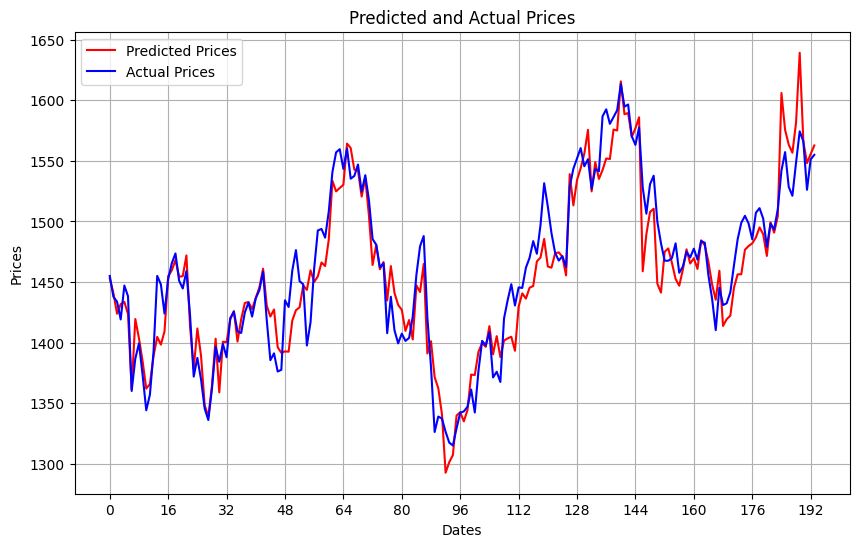

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.xticks(range(0, len(y_inverse), 16))
plt.plot(predictions, 'r', label='Predicted Prices')
plt.plot(y_inverse, 'b', label='Actual Prices')
plt.title('Predicted and Actual Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_inverse, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_inverse, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate Mean Absolute Percentage Error
mape = np.mean(np.abs((y_inverse - predictions) / y_inverse)) * 100
print(f"Mean Absolute Percentage Error: {mape} %")

Mean Absolute Error: 17.282373172720682
Mean Squared Error: 516.8154995649592
Root Mean Squared Error: 22.733576479844942
Mean Absolute Percentage Error: 1.1814012606018194 %


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error
mae = mean_absolute_error(testY, predictions_scaled)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(testY, predictions_scaled)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate Mean Absolute Percentage Error
mape = np.mean(np.abs((testY - predictions_scaled) / testY)) * 100
print(f"Mean Absolute Percentage Error: {mape} %")

Mean Absolute Error: 0.010558817515977799
Mean Squared Error: 0.0001929120052240944
Root Mean Squared Error: 0.01388927662709957
Mean Absolute Percentage Error: 1.3818108581773427 %
